In [103]:
strategy = 'RSIROC1'

In [104]:
import pandas as pd

strategy_stats_df = pd.read_parquet('equity_curves/%s.parquet' % strategy)
strategy_stats_df.loc[:, 'ratio'] = (strategy_stats_df.equity_curve / strategy_stats_df.equity_curve_mv_avg).fillna(0)

In [106]:
strategy_stats_df2 = pd.read_parquet('equity_curves/RSIROC2.parquet')

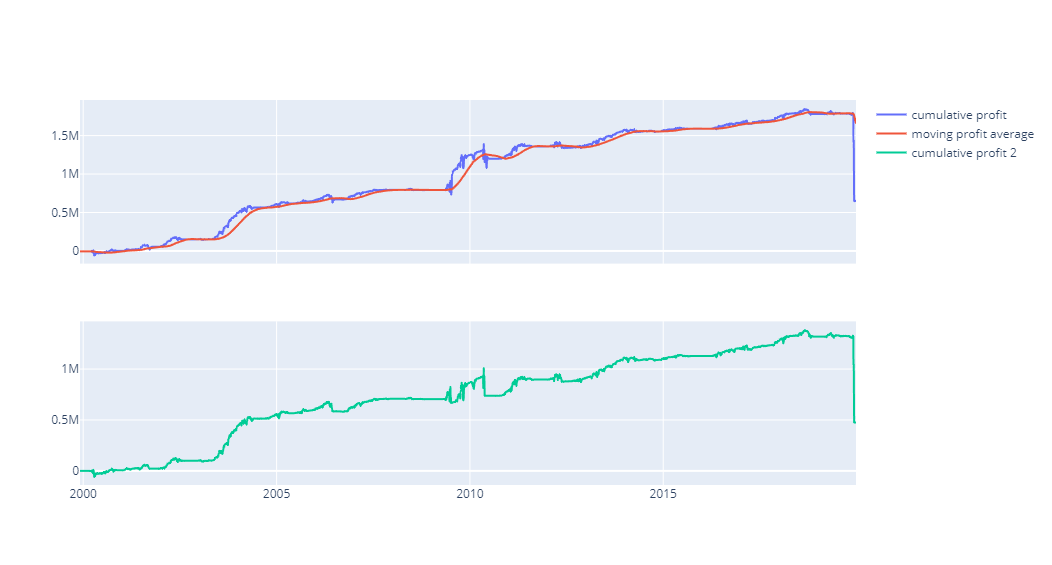

In [107]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=True)
fig.add_trace(
    go.Scattergl(
        x=strategy_stats_df['date'], y=strategy_stats_df['equity_curve'], name='cumulative profit'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scattergl(
        x=strategy_stats_df['date'], y=strategy_stats_df['equity_curve_mv_avg'], name='moving profit average'
    ),
    row=1, col=1
)
'''
fig.add_trace(
    go.Scattergl(
        x=strategy_stats_df['date'], y=strategy_stats_df['ratio'], name='ratio'
    ),
    row=2, col=1
)

'''

fig.add_trace(
    go.Scattergl(
        x=strategy_stats_df2['date'], y=strategy_stats_df2['equity_curve'], name='cumulative profit 2'
    ),
    row=2, col=1
)

'''

fig.add_trace(
    go.Scattergl(
        x=strategy_stats_df['date'], y=strategy_stats_df['cum_prof2'], name='cumulative profit 2'
    ),
    row=2, col=1
)
'''

fig.update_layout(height=550, width=1200)

In [ ]:
stat_range = 200
df.loc[:, 'win'] = 0
df.loc[:, 'loss'] = 0
df.loc[df.profit > 1, 'win'] = 1
df.loc[df.profit < 1, 'loss'] = 1
df.loc[:, 'win_sum'] = df.win.rolling('%dd' % stat_range).sum()
df.loc[:, 'loss_sum'] = df.loss.rolling('%dd' % stat_range).sum()
df.loc[:, 'win_rate'] = df.win_sum / (df.win_sum + df.loss_sum) 
df.groupby('date').agg{''}